In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
bommov = pd.read_csv('data/zippedData/bom.movie_gross.csv')

imdbnambas = pd.read_csv('data/zippedData/imdb.name.basics.csv')


imdbtitaka = pd.read_csv('data/zippedData/imdb.title.akas.csv')


imdbtitcrw = pd.read_csv('data/zippedData/imdb.title.basics.csv')


imdbtitprn = pd.read_csv('data/zippedData/imdb.title.principals.csv')


imdbtitrat = pd.read_csv('data/zippedData/imdb.title.ratings.csv')


rtmovinf = pd.read_csv('data/zippedData/rt.movie_info.tsv', sep='\t')

rtreviews = pd.read_csv('data/zippedData/rt.reviews.tsv', sep='\t', encoding='ISO-8859-1')


tmdbmovies = pd.read_csv('data/zippedData/tmdb.movies.csv')


tnmovbud = pd.read_csv('data/zippedData/tn.movie_budgets.csv')

In [4]:

#bommov.groupby(['studio','year']).sum()

In [5]:
bommov.groupby('studio').sum()

,domestic_gross,year
studio,,
3D,6100000.0,2010
A23,164200.0,4024
A24,324194200.0,98754
ADC,248200.0,4032
AF,2142900.0,12080
...,...,...
XL,458000.0,4027
YFG,1100000.0,2016
Yash,31631400.0,28194


In [6]:
bommov.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [7]:
bommov['foreign_gross'] = bommov['foreign_gross'].fillna(0)

In [8]:
bommov['foreign_gross'] = pd. to_numeric(bommov['foreign_gross'], errors = 'coerce')

In [9]:

studio10ten = bommov.groupby('studio').sum().sort_values('domestic_gross',ascending=False).head(10)
studio10ten

,domestic_gross,foreign_gross,year
studio,,,
BV,1.841903e+10,2.579385e+10,213451
Uni.,1.290239e+10,1.685477e+10,296082
WB,1.216805e+10,1.866790e+10,281941
Fox,1.094950e+10,2.005587e+10,273882
Sony,8.459683e+09,1.394535e+10,221575
Par.,7.685871e+09,1.186338e+10,203417
LGF,4.118963e+09,4.482619e+09,207437
WB (NL),3.995700e+09,6.339000e+09,90644
LG/S,2.078200e+09,3.353724e+09,82599


In [10]:
studio_list = ['BV', 'Uni.', 'WB', 'Fox', 'Sony', 'Par.', 'LGF', 'WB (NL)', 'LG/S',
       'P/DW']
bommov10 = bommov[bommov['studio'].isin(studio_list)]

In [11]:
bommov10.shape

(939, 5)

In [13]:
bommov10.groupby('studio').sum()

,domestic_gross,foreign_gross,year
studio,,,
BV,1.841903e+10,2.579385e+10,213451
Fox,1.094950e+10,2.005587e+10,273882
LG/S,2.078200e+09,3.353724e+09,82599
LGF,4.118963e+09,4.482619e+09,207437
P/DW,1.682900e+09,3.393600e+09,20109
Par.,7.685871e+09,1.186338e+10,203417
Sony,8.459683e+09,1.394535e+10,221575
Uni.,1.290239e+10,1.685477e+10,296082
WB,1.216805e+10,1.866790e+10,281941


In [14]:
bommov['world_wide_gross'] = bommov['domestic_gross']+bommov['foreign_gross']

In [15]:
studio_list = ['BV', 'Uni.', 'WB', 'Fox', 'Sony', 'Par.', 'LGF', 'WB (NL)', 'LG/S',
       'P/DW']
bommov10 = bommov[bommov['studio'].isin(studio_list)]
bommov10.studio.unique()

array(['BV', 'WB', 'P/DW', 'Par.', 'Uni.', 'Fox', 'Sony', 'WB (NL)',
       'LGF', 'LG/S'], dtype=object)

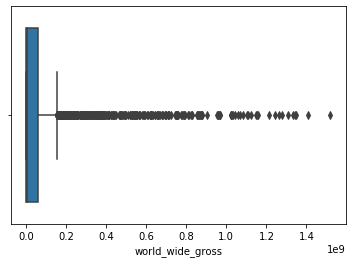

In [19]:
bommov.head(10)

sns.boxplot(bommov['world_wide_gross'])

In [ ]:
sns.

In [184]:
bommov.year

0       2010
1       2010
2       2010
3       2010
4       2010
        ... 
3382    2018
3383    2018
3384    2018
3385    2018
3386    2018
Name: year, Length: 3387, dtype: int64

In [34]:
bommov.year.unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [169]:
bommov['foreign_gross'] = bommov['foreign_gross'].fillna(0)

In [170]:
bommov['foreign_gross'] = pd. to_numeric(bommov['foreign_gross'], errors = 'coerce')

Text(0.5, 1.0, 'World-wide Gross by Studio')

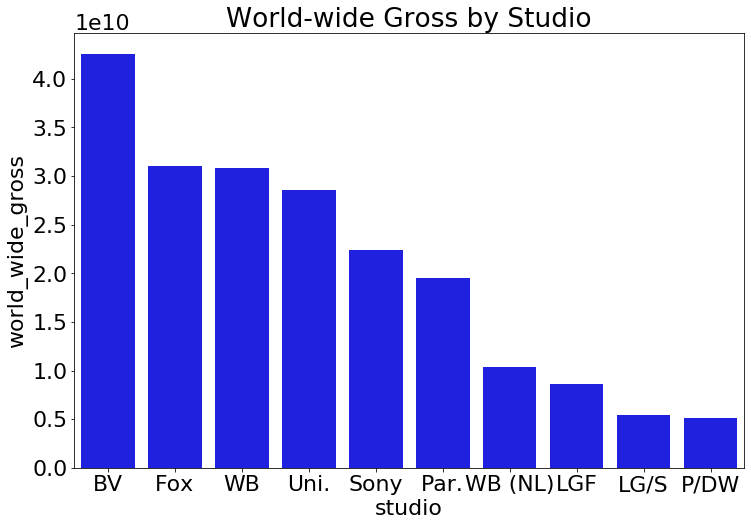

In [23]:
studio10ten = bommov.groupby('studio').sum().sort_values('world_wide_gross',ascending=False).head(10)
plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 22})
sns.barplot(x=studio10ten.index, y = studio10ten['world_wide_gross'], color = 'blue')
plt.title('World-wide Gross by Studio')

In [191]:
studio10ten

,domestic_gross,foreign_gross,year,world-wide gross
studio,,,,
BV,1.841903e+10,2.579385e+10,213451,4.421288e+10
Fox,1.094950e+10,2.005587e+10,273882,3.100537e+10
WB,1.216805e+10,1.866790e+10,281941,3.083595e+10
Uni.,1.290239e+10,1.685477e+10,296082,2.975716e+10
Sony,8.459683e+09,1.394535e+10,221575,2.240492e+10
Par.,7.685871e+09,1.186338e+10,203417,1.954926e+10
WB (NL),3.995700e+09,6.339000e+09,90644,1.033470e+10
LGF,4.118963e+09,4.482619e+09,207437,8.594583e+09
LG/S,2.078200e+09,3.353724e+09,82599,5.431924e+09


### Find studio profit according to year

In [138]:
import matplotlib.pyplot as plt

In [237]:
bommov.head()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [21]:
studio_list = ['BV', 'Uni.', 'WB', 'Fox', 'Sony', 'Par.', 'LGF', 'WB (NL)', 'LG/S',
       'P/DW']
bommov10 = bommov[bommov['studio'].isin(studio_list)]
bommov10.studio.unique()

array(['BV', 'WB', 'P/DW', 'Par.', 'Uni.', 'Fox', 'Sony', 'WB (NL)',
       'LGF', 'LG/S'], dtype=object)

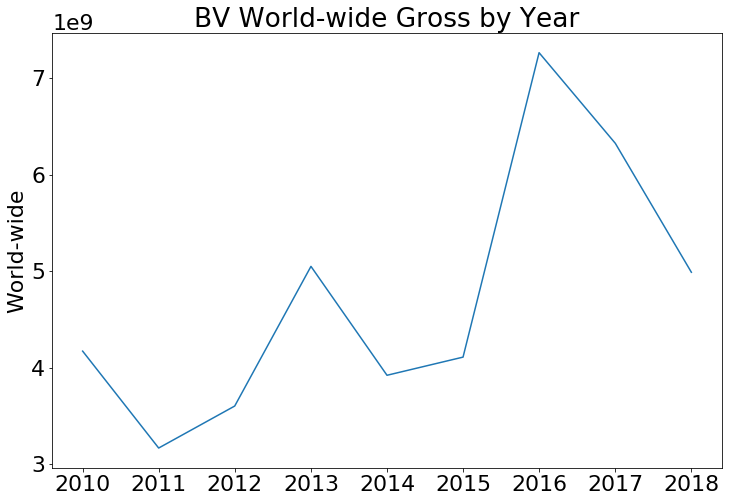

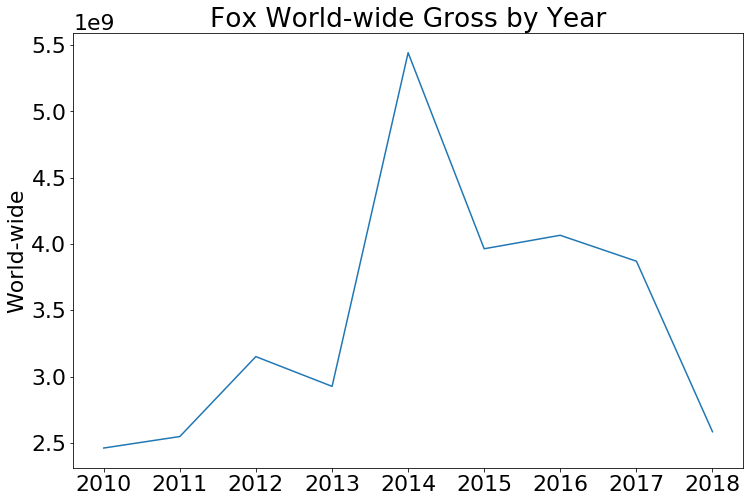

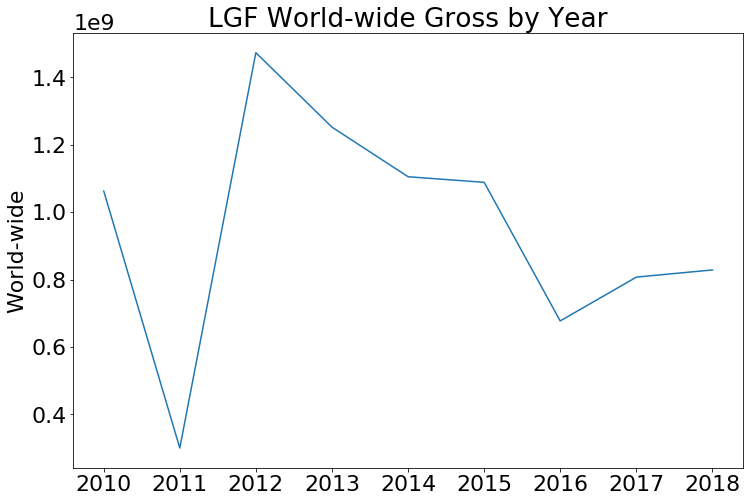

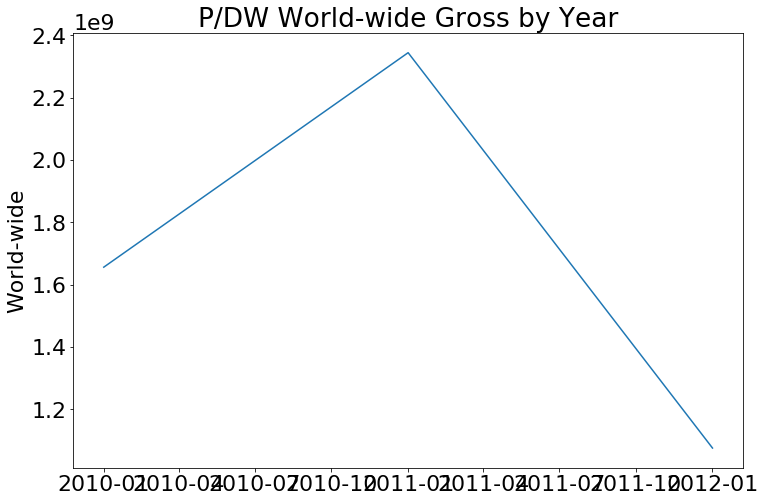

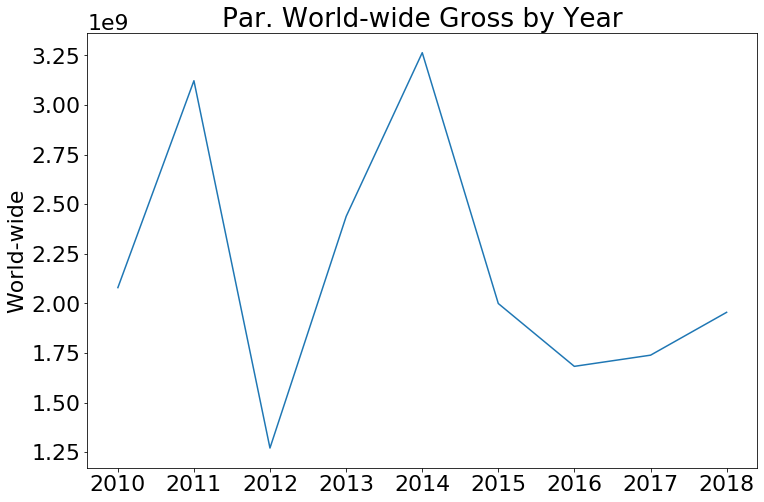

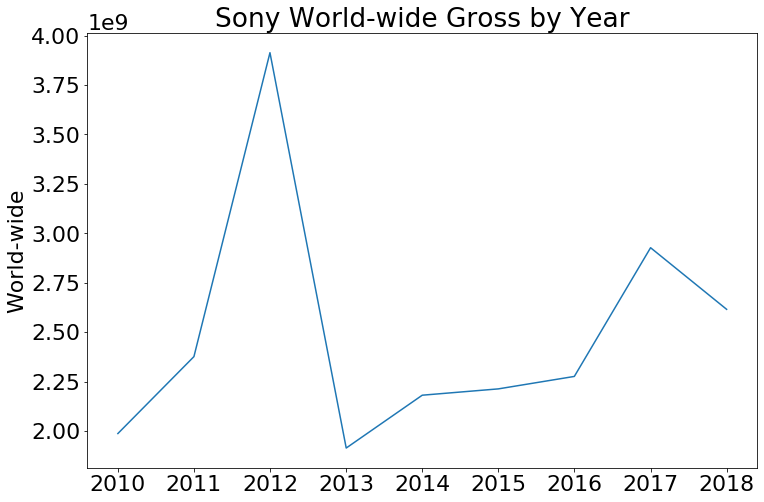

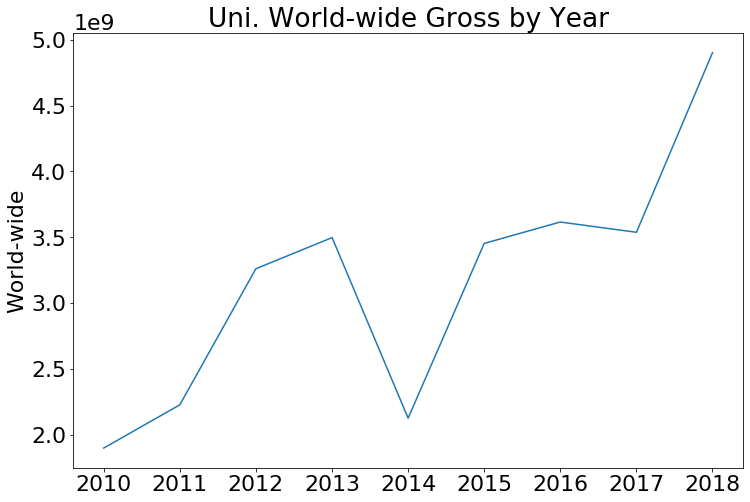

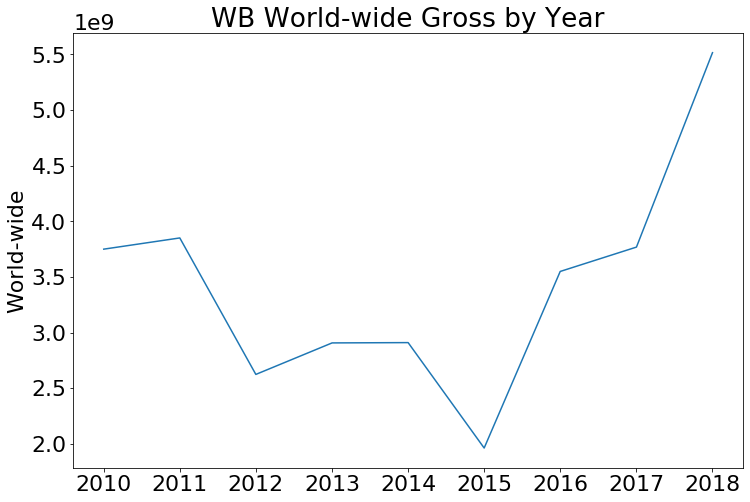

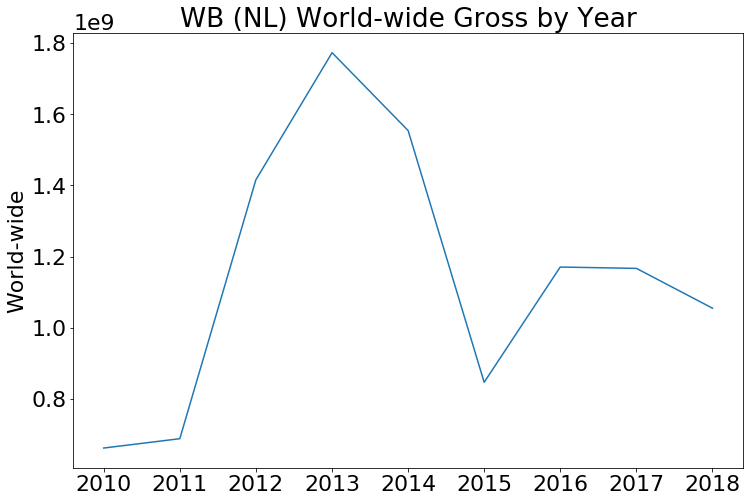

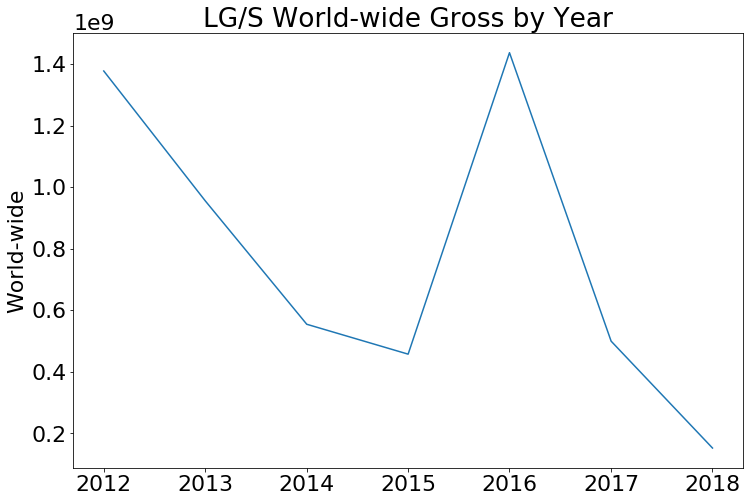

In [28]:

dfs = []
for year in bommov10.year.unique():             
    c = bommov10[bommov10.year == year].groupby('studio').sum()
    c['year'] = year
    dfs.append(c)
x = pd.concat(dfs).reset_index()
x.year = pd.to_datetime(x.year, format = '%Y')
x.set_index('year', inplace = True)
for studio in x.studio.unique():
    plt.figure(figsize=(12,8))
    plt.plot(x[x.studio == studio].world_wide_gross)
    plt.ylabel('World-wide')
    
    plt.title(studio + ' World-wide Gross by Year')
    plt.show()

In [140]:
x

,studio,domestic_gross,foreign_gross
year,,,
1970-01-01 00:00:00.000002010,3D,6.100000e+06,9.900000e+06
1970-01-01 00:00:00.000002010,ATO,1.000000e+06,4.070000e+04
1970-01-01 00:00:00.000002010,Abr.,2.574000e+05,9.010000e+05
1970-01-01 00:00:00.000002010,Anch.,1.171510e+07,7.999000e+06
1970-01-01 00:00:00.000002010,App.,3.600000e+06,1.100000e+06
...,...,...,...
1970-01-01 00:00:00.000002018,Vita.,1.490000e+05,0.000000e+00
1970-01-01 00:00:00.000002018,WB,1.729100e+09,3.786400e+09
1970-01-01 00:00:00.000002018,WB (NL),3.955000e+08,6.598000e+08


In [ ]:
loop over the dataframe, then create a dictionary where the studio=key

In [76]:
bommov.foreign_gross.dtypes

dtype('float64')

In [44]:
bommov['domestic_gross'] = bommov['domestic_gross'].fillna(0)

In [99]:
len(bommov['studio'].unique())

258

In [66]:
bommov.studio.value_counts()

IFC       166
Uni.      147
WB        140
Fox       136
Magn.     136
         ... 
KKM         1
MUBI        1
CFilms      1
Rocket      1
Arrow       1
Name: studio, Length: 257, dtype: int64

In [77]:
bommov.tail()


,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,0.0,2018
3383,Edward II (2018 re-release),FM,4800.0,0.0,2018
3384,El Pacto,Sony,2500.0,0.0,2018
3385,The Swan,Synergetic,2400.0,0.0,2018
3386,An Actor Prepares,Grav.,1700.0,0.0,2018


In [33]:
imdbnambas['birth_year'] = imdbnambas['birth_year'].fillna(0)

In [34]:
imdbnambas['birth_year'] = imdbnambas['birth_year'].astype(int)

In [35]:
imdbnambas.birth_year.dtypes

dtype('int64')

In [36]:
imdbnambas['death_year'] = imdbnambas['death_year'].fillna(0)

In [37]:
imdbnambas['death_year'] = imdbnambas['death_year'].astype(int)

In [38]:
imdbnambas.death_year.dtypes

dtype('int64')

In [ ]:
imdbnambas

In [115]:
imdbtitcrw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [110]:
imdbtitcrw.head()





,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [118]:
imdbtitcrw['genres'] = imdbtitcrw['genres'].astype(str)
count = {}
for item in imdbtitcrw['genres']:
    genre_split = item.split(',')
    for item in genre_split:
        if item not in count:
            count[item] = 1
        else:
            count[item] += 1
                
print(count)

{'Action': 10335, 'Crime': 6753, 'Drama': 49883, 'Biography': 8722, 'Comedy': 25312, 'Fantasy': 3516, 'Horror': 10805, 'Thriller': 11883, 'Adventure': 6465, 'Animation': 2799, 'Documentary': 51640, 'History': 6225, 'nan': 5408, 'Mystery': 4659, 'Sci-Fi': 3365, 'Romance': 9372, 'Family': 6227, 'War': 1405, 'Music': 4314, 'Sport': 2234, 'Western': 467, 'Musical': 1430, 'Adult': 25, 'News': 1551, 'Talk-Show': 50, 'Reality-TV': 98, 'Game-Show': 4, 'Short': 11}


In [126]:
listoftuples = sorted(count.items(), key=lambda x: x[1], reverse = True)
listoftuples

[('Documentary', 51640),
 ('Drama', 49883),
 ('Comedy', 25312),
 ('Thriller', 11883),
 ('Horror', 10805),
 ('Action', 10335),
 ('Romance', 9372),
 ('Biography', 8722),
 ('Crime', 6753),
 ('Adventure', 6465),
 ('Family', 6227),
 ('History', 6225),
 ('nan', 5408),
 ('Mystery', 4659),
 ('Music', 4314),
 ('Fantasy', 3516),
 ('Sci-Fi', 3365),
 ('Animation', 2799),
 ('Sport', 2234),
 ('News', 1551),
 ('Musical', 1430),
 ('War', 1405),
 ('Western', 467),
 ('Reality-TV', 98),
 ('Talk-Show', 50),
 ('Adult', 25),
 ('Short', 11),
 ('Game-Show', 4)]

In [136]:
genrekey = map(lambda x: x[0],listoftuples)

genrekey = list(genrekey)
genrekey10=genrekey[1:11]
genrekey10

['Drama',
 'Comedy',
 'Thriller',
 'Horror',
 'Action',
 'Romance',
 'Biography',
 'Crime',
 'Adventure',
 'Family']

In [140]:
genrevalue = map(lambda x: x[1],listoftuples)
genrevalue = list(genrevalue)
genrevalue10 = genrevalue[1:11]
genrevalue10

[49883, 25312, 11883, 10805, 10335, 9372, 8722, 6753, 6465, 6227]

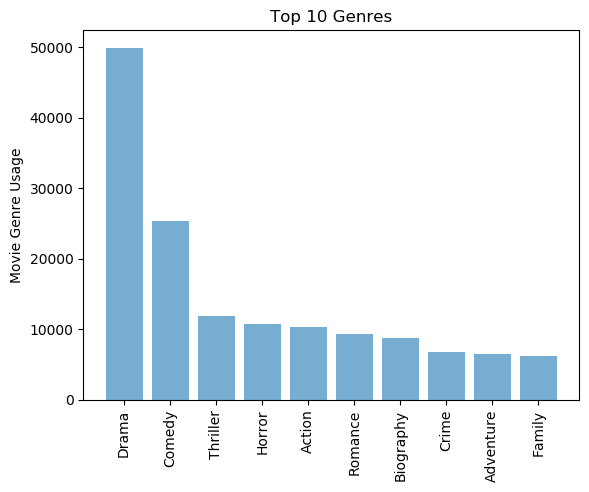

In [146]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

Genre = ('Drama', 'Comedy', 'Thriller', 'Horror', 'Action', 'Romance', 'Biography', 'Crime', 'Adventure','Family')
 
y_pos = np.arange(len(Genre))
gen_usage = [49883, 25312, 11883, 10805, 10335, 9372, 8722, 6753, 6465, 6227]

plt.bar(y_pos, gen_usage, align='center', alpha=0.6)
plt.xticks(y_pos, Genre)
plt.ylabel('Movie Genre Usage')
plt.title('Top 10 Genres')
plt.xticks(rotation = 90)
plt.show()

In [107]:
#imdbtitcrw.genres.value_counts().head(10)



In [55]:
rtmovinf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
id              1560 non-null int64
synopsis        1498 non-null object
rating          1557 non-null object
genre           1552 non-null object
director        1361 non-null object
writer          1111 non-null object
theater_date    1201 non-null object
dvd_date        1201 non-null object
currency        340 non-null object
box_office      340 non-null object
runtime         1530 non-null object
studio          494 non-null object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [56]:
rtmovinf.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [65]:
rtmovinf['box_office'] = rtmovinf['box_office'].fillna(0)

In [36]:
#rtmovinf['box_office'] = pd. to_numeric(rtmovinf['box_office'], errors = 'coerce')

In [68]:
rtmovinf['box_office'] = rtmovinf['box_office'].str.replace(',', '').astype(float)

In [66]:
rtmovinf.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,0,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000,108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,0,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,0,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,0,200 minutes,NaN


In [69]:
rtmovinf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
id              1560 non-null int64
synopsis        1498 non-null object
rating          1557 non-null object
genre           1552 non-null object
director        1361 non-null object
writer          1111 non-null object
theater_date    1201 non-null object
dvd_date        1201 non-null object
currency        340 non-null object
box_office      340 non-null float64
runtime         1530 non-null object
studio          494 non-null object
dtypes: float64(1), int64(1), object(10)
memory usage: 146.4+ KB


In [71]:
rtmovinf.groupby('director').sum().sort_values('box_office', ascending=False).head(10)

,id,box_office
director,,
Jay Roach,2329,443622410.0
Mel Gibson,1071,368000000.0
Sam Mendes,2340,322177808.0
Peter Jackson,1415,303001229.0
Bryan Singer,2692,297802264.0
Steven Spielberg,9757,279441552.0
Chris Columbus,3323,261835892.0
Gore Verbinski,1819,251767930.0
Joel Zwick,661,241250669.0


In [30]:
rtmovinf.box_office.value_counts()

0              1220
20,900,803        2
32,000,000        2
600,000           2
200,000           2
               ... 
104,880,310       1
67,631,157        1
26,973,524        1
241,672           1
12,583,510        1
Name: box_office, Length: 337, dtype: int64

In [42]:
rtreviews.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
id            54432 non-null int64
review        48869 non-null object
rating        40915 non-null object
fresh         54432 non-null object
critic        51710 non-null object
top_critic    54432 non-null int64
publisher     54123 non-null object
date          54432 non-null object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [43]:
rtreviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [44]:
tmdbmovies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
Unnamed: 0           26517 non-null int64
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [45]:
tmdbmovies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [51]:
tnmovbud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [52]:
tnmovbud.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [17]:
tnmovbud['production_budget'] = tnmovbud['production_budget'].str.replace(',', '').str.replace('$', '').astype(int)

In [18]:
tnmovbud['domestic_gross'] = tnmovbud['domestic_gross'].str.replace(',', '').str.replace('$', '').astype(int)

In [19]:
tnmovbud['worldwide_gross'] = tnmovbud['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(int)

In [20]:
tnmovbud.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425
8,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209
9,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923


In [21]:
tnmovbud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null int64
domestic_gross       5782 non-null int64
worldwide_gross      5782 non-null int64
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [22]:
top10movies = tnmovbud.sort_values(by='worldwide_gross', ascending = False).head(10)
top10movies


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864
66,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
41,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157


In [149]:
worldwide = top10movies['worldwide_gross']

In [ ]:
domestic = top10movies['domestic_gross']

In [152]:
budget = top10movies['production_budget']

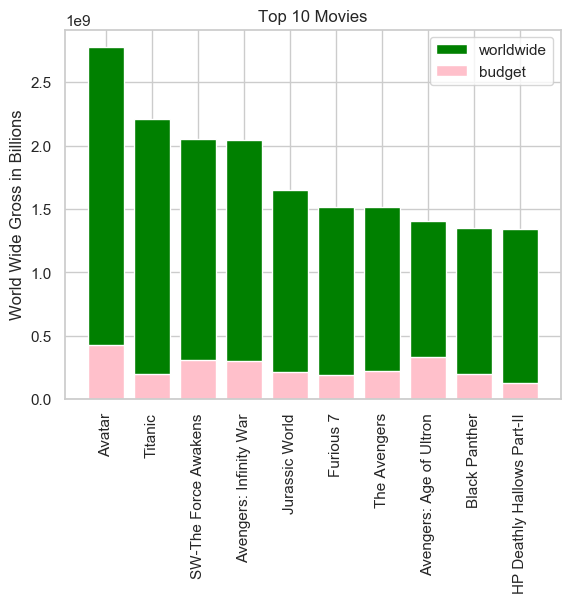

In [159]:

movies = ['Avatar', 'Titanic', 'SW-The Force Awakens', 'Avengers: Infinity War', 'Jurassic World', 'Furious 7', 'The Avengers', 'Avengers: Age of Ultron', 'Black Panther', 'HP Deathly Hallows Part-II']

plt.bar(movies, worldwide, color = 'green')
plt.bar(movies, budget, color = 'pink')
plt.xticks(rotation = 90)
plt.legend(['worldwide', 'budget'])
plt.ylabel('World Wide Gross in Billions')

plt.title('Top 10 Movies')
plt.show()

Text(0.5, 1.0, 'Top 10 Movies')

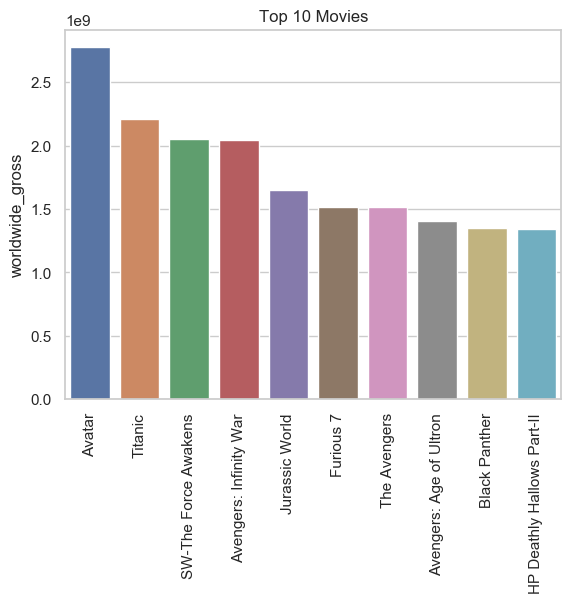

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
movies = ['Avatar', 'Titanic', 'SW-The Force Awakens', 'Avengers: Infinity War', 'Jurassic World', 'Furious 7', 'The Avengers', 'Avengers: Age of Ultron', 'Black Panther', 'HP Deathly Hallows Part-II']
worldwide_gross =[2776345279, 2208208395, 2053311220, 2048134200, 1648854864, 1518722794, 1517935897, 1403013963, 1348258224, 1341693157]
top10movies['worldwide_gross']
sns.barplot (x=movies, y='worldwide_gross',data=top10movies)
plt.xticks(rotation = 90)
plt.title('Top 10 Movies')

In [162]:

top10movies = tnmovbud.sort_values(by='worldwide_gross', ascending = False).head(10)